### Dataset

In [13]:
import numpy as np
np.random.seed(42)

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd

In [15]:
x, y = make_blobs(n_samples=100, centers=1, n_features=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
def dataset_stats(x):
    print(f"Min: {np.min(x, axis=0)}")
    print(f"Max: {np.max(x, axis=0)}")
    print(f"Mean: {np.mean(x, axis=0)}")
    print(f"Std: {np.std(x, axis=0)}")

In [17]:
def plot_dist(x, y):
    cols = [f"f{i}" for i in range(len(x[0]))] + ["y"]
    data = np.hstack([x, y.reshape(-1, 1)])
    df = pd.DataFrame(data, columns=cols)
    sns.jointplot(data=df, x="f0", y="f1")
    plt.show()

In [18]:
dataset_stats(x_train)

Min: [-5.12894273  7.02671721]
Max: [-0.64342311 11.73445529]
Mean: [-2.64201209  9.04633803]
Std: [0.82256171 0.99101696]


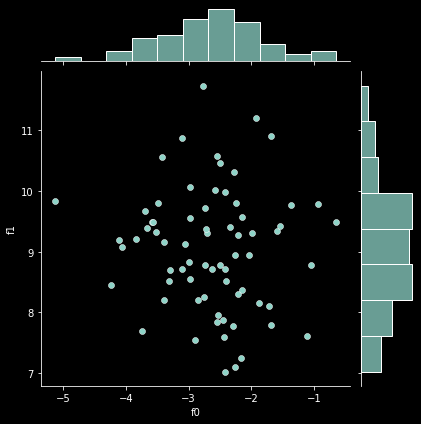

In [19]:
plot_dist(x_train, y_train)

### MinMax Scaler

In [20]:
class MinMaxScaler:
    def __init__(self) -> None:
        self.data_min: np.ndarray = None
        self.data_max: np.ndarray = None

    def fit(self, x: np.ndarray) -> None:
        self.data_min = np.min(x, axis=0)
        self.data_max = np.max(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x - self.data_min) / (self.data_max - self.data_min)
        return x_transformed

In [21]:
scaler = MinMaxScaler()
scaler.fit(x)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

In [22]:
dataset_stats(x_train_transformed)

Min: [0. 0.]
Max: [0.99547011 1.        ]
Mean: [0.55192382 0.42900025]
Std: [0.18255089 0.21050809]


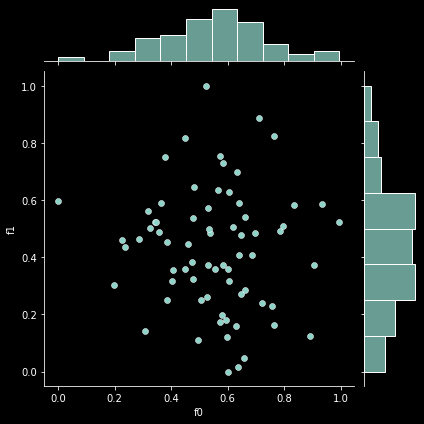

In [23]:
plot_dist(x_train_transformed, y_train)

### Standard Scaler

In [24]:
class StandardScaler:
    def __init__(self) -> None:
        self.mean_: np.ndarray = None
        self.scale_: np.ndarray = None

    def fit(self, x: np.ndarray) -> None:
        self.mean_ = np.mean(x, axis=0)
        self.scale_ = np.std(x, axis=0)

    def transform(self, x: np.ndarray) -> np.ndarray:
        x_transformed = (x - self.mean_) / self.scale_
        return x_transformed

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_transformed = scaler.transform(x_train)
x_test_transformed = scaler.transform(x_test)

In [26]:
dataset_stats(x_train_transformed)

Min: [-3.02339704 -2.03792761]
Max: [2.42971313 2.71248361]
Mean: [ 2.71211625e-16 -1.64788818e-15]
Std: [1. 1.]


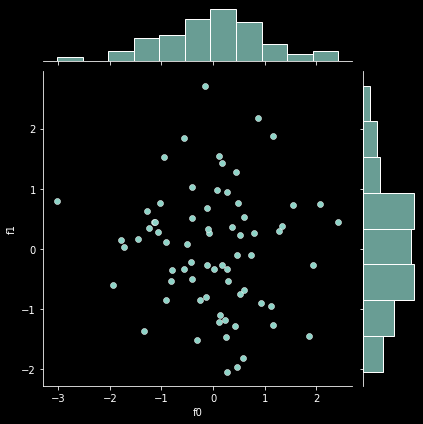

In [27]:
plot_dist(x_train_transformed, y_train)